<a href="https://colab.research.google.com/github/SSTalha/Neuralnetwork-digitmnist/blob/main/neuralnetwork_digitmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:2000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
print(Y_train)
X_train[:,0].shape


[9 0 8 ... 4 6 0]


(784,)

In [ ]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5  # First hidden layer
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5  # Second hidden layer (new layer)
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5   # Output layer
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m_train * dZ3.dot(A2.T)
    db3 = 1 / m_train * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [ ]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy}")
    return W1, b1, W2, b2, W3, b3

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.15, 500)

[0 0 5 ... 5 1 0] [9 0 8 ... 4 6 0]
Iteration: 0, Accuracy: 0.106425
[4 0 5 ... 7 6 5] [9 0 8 ... 4 6 0]
Iteration: 10, Accuracy: 0.5334
[9 0 5 ... 7 6 0] [9 0 8 ... 4 6 0]
Iteration: 20, Accuracy: 0.66065
[9 0 5 ... 7 6 0] [9 0 8 ... 4 6 0]
Iteration: 30, Accuracy: 0.7233
[9 0 5 ... 7 6 0] [9 0 8 ... 4 6 0]
Iteration: 40, Accuracy: 0.760625
[9 0 5 ... 9 6 0] [9 0 8 ... 4 6 0]
Iteration: 50, Accuracy: 0.785775
[9 0 5 ... 9 6 0] [9 0 8 ... 4 6 0]
Iteration: 60, Accuracy: 0.80535
[9 0 5 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 70, Accuracy: 0.818325
[9 0 5 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 80, Accuracy: 0.830425
[9 0 5 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 90, Accuracy: 0.839975
[9 0 8 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 100, Accuracy: 0.847525
[9 0 8 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 110, Accuracy: 0.853775
[9 0 8 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 120, Accuracy: 0.8597
[9 0 8 ... 4 6 0] [9 0 8 ... 4 6 0]
Iteration: 130, Accuracy: 0.865475
[9 0 8 ... 4 6 0] [9 0 8 

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print(f"Prediction: {prediction}, Label: {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [4], Label: 4


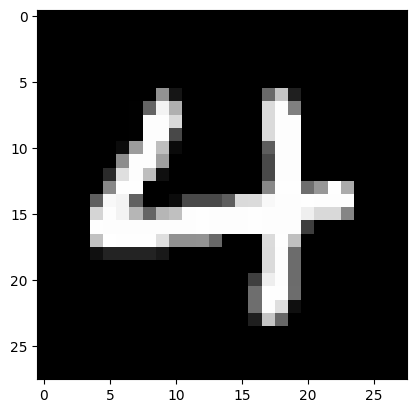

Prediction: [9], Label: 9


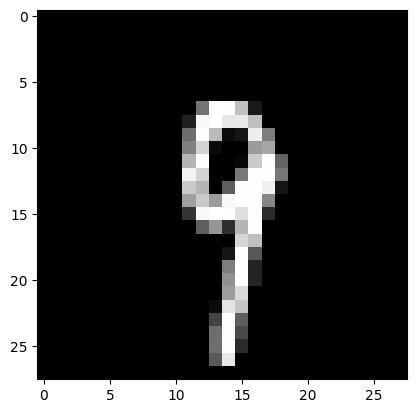

Prediction: [0], Label: 0


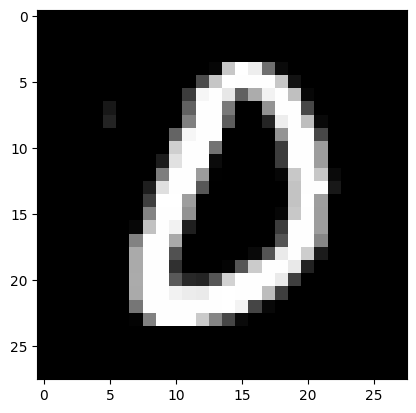

Prediction: [3], Label: 7


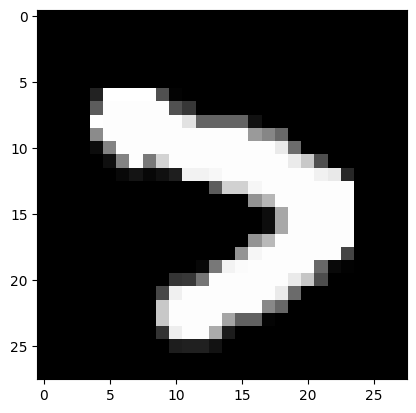

In [ ]:
test_prediction(4, W1, b1, W2, b2, W3, b3)
test_prediction(9, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[0 6 3 ... 0 2 6] [0 6 3 ... 0 2 6]


0.916